# **PART D - EPOCHS**

**Model 4** : In this model, we have changed the count of epochs in the base model from **'30' to '35'**, to check the model performance


# **1. Importing the required libraries and packages**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tqdm as tqdm
import os
from os.path import join
import random
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn .preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
# Importing the Keras libraries and packages

from tensorflow import keras
from keras.layers import Conv2D, Input, MaxPool2D,Flatten, Dense, Permute, GlobalAveragePooling2D
from keras.models import Model
import numpy as np
import pickle
import keras
import cv2
import sys
import dlib
import os.path
from keras.models import Sequential
import pickle
import numpy as np
import cv2
import os
from keras.layers import Dropout

# **2. Downloading data from Kaggle -**

### **Step a:  Loading the data directory from Kaggle using API token-**

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "nikitagaurihar" # username from the json file
os.environ['KAGGLE_KEY'] = "18f1591df0460baf935a1b18eb7a8620" # key from the json file

In [4]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 97% 131M/134M [00:00<00:00, 155MB/s]
100% 134M/134M [00:00<00:00, 176MB/s]


### **Step b:  Mount google drive:**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Unzip training data
from zipfile import ZipFile
zipFile = "/content/drive/MyDrive/Data Science Datasets/DL Project - Kaggle_WeatherDataset/archive.zip"
with ZipFile(zipFile, 'r') as zip:
  zip.extractall()
  print('All files were extracted successfully!!')

All files were extracted successfully!!


### **Step c: Saving extracted file in new folder - 'dataset'**

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Get all the paths
data_dir_list = os.listdir('/content/dataset')
print(data_dir_list)


['cloudy', 'test.csv', 'foggy', 'rainy', 'alien_test', 'sunrise', 'shine']


In [8]:
path, dirs, files = next(os.walk("/content/dataset"))
file_count = len(files)
print(file_count)

1


## **3. Splitting the Dataset for training and testing the model**

### Preparing the folder structure and mapping the image classes to the respective train and validation folders.

### **Folder Structure:**

weather-data (Base Directory)

1. Training Dataset

---------------> cloudy

---------------> foggy

---------------> rainy

---------------> shine

---------------> sunrise

2. Validation Dataset

---------------> cloudy

---------------> foggy

---------------> rainy

---------------> shine

---------------> sunrise

In [9]:
# Make new base directory
original_dataset_dir = '/content/dataset'
base_dir = '/content/weather-data/'
os.mkdir(base_dir)

In [10]:
#create two folders (train and validation) - 
train_dir = os.path.join(base_dir, 'train')                                                                       # train data folder
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')                                                             # validation data folder
os.mkdir(validation_dir)

In [11]:
#Under train folder create five folders - cloud, foggy, rainy, shine, sunrise

train_cloud_dir = os.path.join(train_dir, 'cloudy')                                                                # train data folder--> folder for cloudy images 
os.mkdir(train_cloud_dir)

train_foggy_dir = os.path.join(train_dir, 'foggy')                                                                 # train data folder--> folder for foggy images 
os.mkdir(train_foggy_dir)

train_rainy_dir = os.path.join(train_dir, 'rainy')                                                                 # train data folder--> folder for rainy images 
os.mkdir(train_rainy_dir)

train_shine_dir = os.path.join(train_dir, 'shine')                                                                 # train data folder--> folder for shine images 
os.mkdir(train_shine_dir)

train_sunrise_dir = os.path.join(train_dir, 'sunrise')                                                             # train data folder--> folder for sunrise images 
os.mkdir(train_sunrise_dir)

In [12]:
#Under validation folder create five folders - cloud, foggy, rainy, shine, sunrise

validation_cloud_dir = os.path.join(validation_dir, 'cloudy')                                                      # validation data folder--> folder for cloudy images
os.mkdir(validation_cloud_dir) 

validation_foggy_dir = os.path.join(validation_dir, 'foggy')                                                       # validation data folder--> folder for foggy images
os.mkdir(validation_foggy_dir)

validation_rainy_dir = os.path.join(validation_dir, 'rainy')                                                       # validation data folder--> folder for rainy images
os.mkdir(validation_rainy_dir)

validation_shine_dir = os.path.join(validation_dir, 'shine')                                                       # validation data folder--> folder for shine images
os.mkdir(validation_shine_dir)

validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')                                                   # validation data folder--> folder for sunrise images
os.mkdir(validation_sunrise_dir)

In [13]:
# Setting the training and validation dataset path

train_dir = "/train/"
test_dir = base_dir + "alien_test/"

training_set_path = '/content/weather-data/train'
validation_set_path = '/content/weather-data/train'

#Setting the path for image classes in Training and Validation Folders

train_cloudy_images = '/content/weather-data/train/cloudy'
train_foggy_images = '/content/weather-data/train/foggy'
train_rainy_images = '/content/weather-data/train/rainy'
train_shine_images = '/content/weather-data/train/shine'
train_sunrise_images = '/content/weather-data/train/sunrise'

valid_cloudy_images = '/content/weather-data/validation/cloudy'
valid_foggy_images = '/content/weather-data/validation/foggy'
valid_rainy_images = '/content/weather-data/validation/rainy'
valid_shine_images = '/content/weather-data/validation/shine'
valid_sunrise_images = '/content/weather-data/validation/sunrise'

In [14]:
# Creating function to split the dataset - 
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
          files.append(filename)
        else:
          print(filename + " is zero length, so ignoring.")
  
    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]
        
        
    for filename in training_set:
      this_file = SOURCE + filename
      destination = TRAINING + filename
      copyfile(this_file, destination)

    for filename in valid_set:
      this_file = SOURCE + filename
      destination = VALIDATION + filename
      copyfile(this_file, destination)

In [15]:
CLOUDY_SOURCE_DIR = '/content/dataset/cloudy/'
TRAINING_CLOUDY_DIR = '/content/weather-data/train/cloudy/'
VALID_CLOUDY_DIR = '/content/weather-data/validation/cloudy/'

FOGGY_SOURCE_DIR = '/content/dataset/foggy/'
TRAINING_FOGGY_DIR = '/content/weather-data/train/foggy/'
VALID_FOGGY_DIR = '/content/weather-data/validation/foggy/'

RAINY_SOURCE_DIR = '/content/dataset/rainy/'
TRAINING_RAINY_DIR = '/content/weather-data/train/rainy/'
VALID_RAINY_DIR = '/content/weather-data/validation/rainy/'

SHINE_SOURCE_DIR = '/content/dataset/shine/'
TRAINING_SHINE_DIR = '/content/weather-data/train/shine/'
VALID_SHINE_DIR = '/content/weather-data/validation/shine/'

SUNRISE_SOURCE_DIR = '/content/dataset/sunrise/'
TRAINING_SUNRISE_DIR = '/content/weather-data/train/sunrise/'
VALID_SUNRISE_DIR = '/content/weather-data/validation/sunrise/'

In [16]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CLOUDY_SOURCE_DIR, TRAINING_CLOUDY_DIR, VALID_CLOUDY_DIR, split_size)
split_data(FOGGY_SOURCE_DIR, TRAINING_FOGGY_DIR, VALID_FOGGY_DIR, split_size)
split_data(RAINY_SOURCE_DIR, TRAINING_RAINY_DIR, VALID_RAINY_DIR, split_size)
split_data(SHINE_SOURCE_DIR, TRAINING_SHINE_DIR, VALID_SHINE_DIR, split_size)
split_data(SUNRISE_SOURCE_DIR, TRAINING_SUNRISE_DIR, VALID_SUNRISE_DIR, split_size)

In [17]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Training dataset for {} are: '.format(i)+str(len(os.listdir('/content/weather-data/train/'+i+'/'))))

Training dataset for cloudy are: 255
Training dataset for foggy are: 255
Training dataset for rainy are: 255
Training dataset for shine are: 212
Training dataset for sunrise are: 297


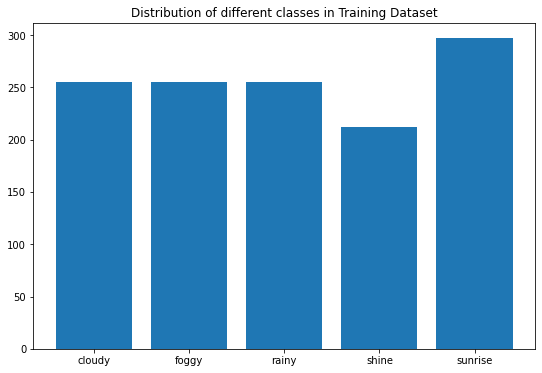

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

classes = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
imageCount = {}
for i in classes:
    nimages = len(os.listdir('/content/weather-data/train/'+i+'/'))
    imageCount[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(imageCount)), list(imageCount.values()), align='center')
plt.xticks(range(len(imageCount)), list(imageCount.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [19]:
for i in ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']:
    print('Validation dataset for {} are: '.format(i)+str(len(os.listdir('/content/weather-data/validation/'+i+'/'))))

Validation dataset for cloudy are: 45
Validation dataset for foggy are: 45
Validation dataset for rainy are: 45
Validation dataset for shine are: 38
Validation dataset for sunrise are: 53


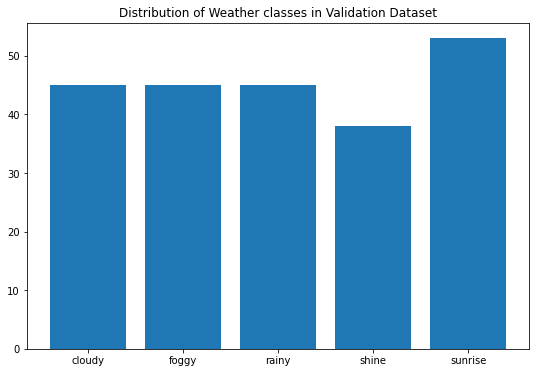

In [20]:
classes = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']
imageCount = {}
for i in classes:
    nimages = len(os.listdir('/content/weather-data/validation/'+i+'/'))
    imageCount[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(imageCount)), list(imageCount.values()), align='center')
plt.xticks(range(len(imageCount)), list(imageCount.keys()))
plt.title('Distribution of Weather classes in Validation Dataset')
plt.show()

In [21]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

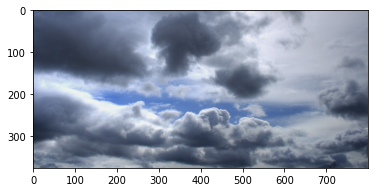

In [22]:
# load the image
testimage = load_img('/content/weather-data/train/cloudy/cloudy102.jpg')

plt.imshow(testimage)

In [23]:
train_dir = '/content/weather-data/train'

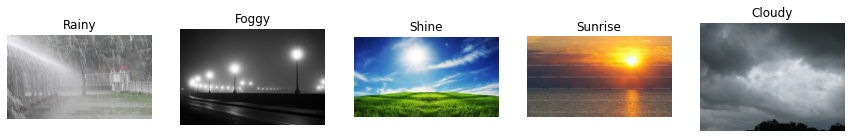

In [24]:
# Displaying random image from the dataset

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

sample_paper = random.choice(os.listdir(train_dir + '/rainy'))
image = load_img(train_dir + "/rainy/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("Rainy")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + '/foggy'))
image = load_img(train_dir + "/foggy/" + sample_rock)
ax[1].imshow(image)
ax[1].set_title("Foggy")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + '/shine'))
image = load_img(train_dir + "/shine/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Shine")
ax[2].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + '/sunrise'))
image = load_img(train_dir + "/sunrise/" + sample_scissor)
ax[3].imshow(image)
ax[3].set_title("Sunrise")
ax[3].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + '/cloudy'))
image = load_img(train_dir + "/cloudy/" + sample_scissor)
ax[4].imshow(image)
ax[4].set_title("Cloudy")
ax[4].axis("Off")


plt.show()

## **4. Deep Learning with Data Augumentation:** 

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
img_width=256; img_height=256
batch_size=32

**Interpretation**:

We have kept batch size = 16
count of epochs = 25

### **Part 1 - Data Preprocessing -**

In [27]:
TRAINING_DIR = '/content/weather-data/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 1274 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [28]:
VALIDATION_DIR = '/content/weather-data/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 226 images belonging to 5 classes.


**Interpretation**: Since our dataset has 5 different labels, we have taken mode as 'categorical'.

In [30]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

**Interpretation:**

We are saving our best model file here on drive.

### Part 2 - Model Building

### **We have changed the epoch count from 30 to 35 here, again running the model to check the model accuracy -**


In [31]:
model_epochs = Sequential([
                           Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), 
                           MaxPooling2D(2, 2),
    
                           Conv2D(32, (3, 3), activation='relu'), 
                           MaxPooling2D(2, 2),
                           
                           Conv2D(64, (3, 3), activation='relu'),
                           Conv2D(64, (3, 3), activation='relu'),
                           MaxPooling2D(2, 2),
                          
                           Conv2D(128, (3, 3), activation='relu'),
                           Conv2D(128, (3, 3), activation='relu'),
                           MaxPooling2D(2, 2),
                          
                           Conv2D(256, (3, 3), activation='relu'),
                           Conv2D(256, (3, 3), activation='relu'),
                           Conv2D(256, (3, 3), activation='relu'),
                           MaxPooling2D(2, 2),

                           Flatten(),
                           
                           Dense(512, activation='relu'),
                           Dense(512, activation='relu'),
                           Dense(5, activation='softmax')
])
model_epochs.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

**Interpretation**: We can see that the output shows 5 output classes in the last 'dense_2' layer. That means,our model knows how to classify the images now.

In [32]:
# Compiling the CNN
model_epochs.compile(optimizer='Adam',
                     loss='categorical_crossentropy', 
                     metrics =['accuracy'])

In [34]:
history_epochs = model_epochs.fit_generator(train_generator,
                                            epochs=35,
                                            verbose=1,
                                            validation_data=validation_generator,
                                            callbacks = [best_model]
                                            )

Epoch 1/35
40/40 [==============================] - 26s 640ms/step - loss: 1.6074 - accuracy: 0.2300 - val_loss: 1.5951 - val_accuracy: 0.3009
Epoch 2/35
40/40 [==============================] - 25s 629ms/step - loss: 1.4920 - accuracy: 0.3462 - val_loss: 1.2320 - val_accuracy: 0.3938
Epoch 3/35
40/40 [==============================] - 27s 665ms/step - loss: 1.2365 - accuracy: 0.4168 - val_loss: 1.2065 - val_accuracy: 0.4735
Epoch 4/35
40/40 [==============================] - 26s 645ms/step - loss: 1.1512 - accuracy: 0.4757 - val_loss: 1.0239 - val_accuracy: 0.5265
Epoch 5/35
40/40 [==============================] - 25s 624ms/step - loss: 1.0352 - accuracy: 0.5565 - val_loss: 1.0167 - val_accuracy: 0.5310
Epoch 6/35
40/40 [==============================] - 25s 630ms/step - loss: 1.0168 - accuracy: 0.5471 - val_loss: 0.9248 - val_accuracy: 0.5487
Epoch 7/35
40/40 [==============================] - 25s 627ms/step - loss: 0.9188 - accuracy: 0.5934 - val_loss: 0.9043 - val_accuracy: 0.6062

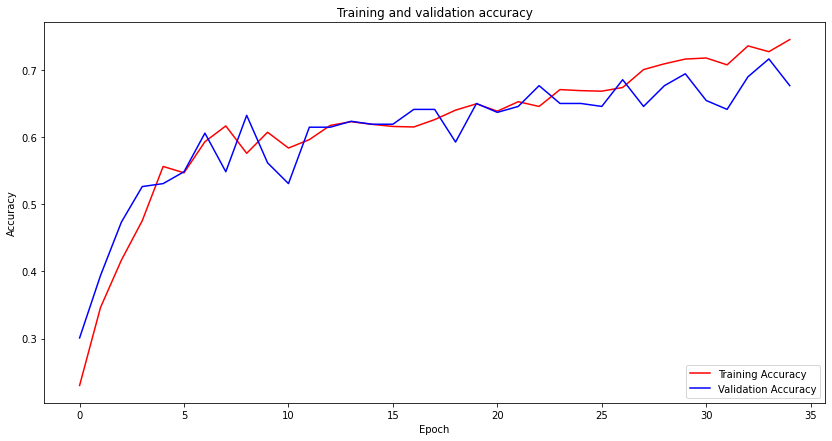

In [36]:
acc4=history_epochs.history['accuracy']
val_acc4=history_epochs.history['val_accuracy']
loss4=history_epochs.history['loss']
val_loss4=history_epochs.history['val_loss']

epochs=range(len(acc4))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc4, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc4, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

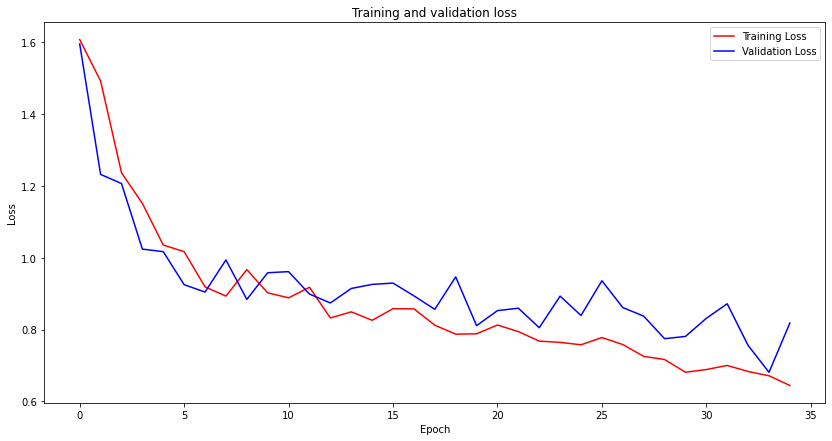

In [38]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss4, 'r', label="Training Loss")
plt.plot(epochs, val_loss4, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

**Interpretation:** From the above graphs, we can interpret that-

 - training accuracy = 0.7757
 - validation accuracy = 0.6770
 - training loss = 0.6441
 - validation loss =  0.8182

 This shows that the training model were trained better than validation as training accuracy is higher and training loss is lower.



### **Checking performance on Test Data**

In [39]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [40]:
# Read Test Images Dir and their labels
test_images_dir = '/content/dataset/alien_test/'
test_df = pd.read_csv('/content/dataset/test.csv')

# put them in a list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/test_preproc_CNN.npy', test_preprocessed_images)

In [42]:
array = model_epochs.predict(test_preprocessed_images, batch_size=1, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

30/30 [==============================] - 0s 4ms/step
[1 0 3 3 1 2 4 1 1 1 4 3 2 1 2 2 2 2 2 2 3 3 3 4 4 4 4 4 4 4]


In [43]:
test_df = pd.read_csv('/content/dataset/test.csv')
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: labels, dtype: int64


In [44]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

### **Classification report for base model is as follows-**


In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[1, 1, 0, 2, 0],
       [0, 5, 2, 1, 2],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 7]])

In [53]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

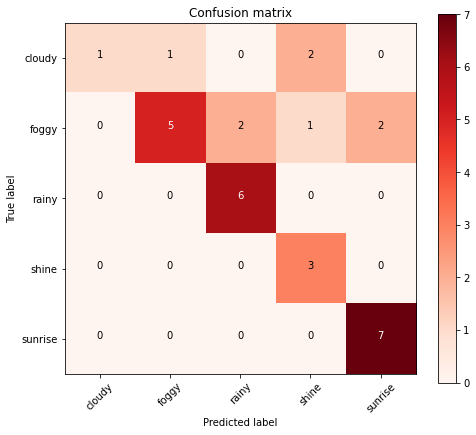

In [55]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix')
plt.show()

**Interpretation:**

From confusion matrix, we can interpret how many true positives did the model predict correctly for the 5 different classes.

- Cloudy - 1 out of 4 images were classified correctly.
- Foggy -  5 out of 10 images were classified correctly.
- rainy -  6 out of 6 images were classified correctly.
- sunrise -  3 out of 3 images were classified correctly.
- shine - 7 out of 7 images were classified correctly.


